### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

/usr/local/anaconda/python3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.8.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [7]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(trainY)
y_test = np_utils.to_categorical(testY)
num_classes = y_test.shape[1]

#### Expected Output should look like this

In [42]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

/usr/local/anaconda/python3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


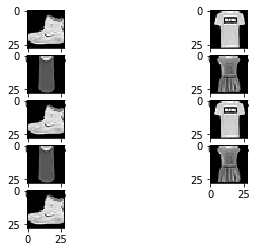

In [12]:
import matplotlib.pyplot as plt
plt.subplot(521)
plt.imshow(trainX[0], cmap=plt.get_cmap('gray'))
plt.subplot(522)
plt.imshow(trainX[1], cmap=plt.get_cmap('gray'))
plt.subplot(523)
plt.imshow(trainX[2], cmap=plt.get_cmap('gray'))
plt.subplot(524)
plt.imshow(trainX[3], cmap=plt.get_cmap('gray'))
plt.subplot(525)
plt.imshow(trainX[0], cmap=plt.get_cmap('gray'))
plt.subplot(526)
plt.imshow(trainX[1], cmap=plt.get_cmap('gray'))
plt.subplot(527)
plt.imshow(trainX[2], cmap=plt.get_cmap('gray'))
plt.subplot(528)
plt.imshow(trainX[3], cmap=plt.get_cmap('gray'))
plt.subplot(529)
plt.imshow(trainX[0], cmap=plt.get_cmap('gray'))
#plt.subplot(5210)
#plt.imshow(trainX[1], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

#### Expected Output

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras import optimizers

In [30]:
num_pixels = trainX.shape[1] * trainX.shape[2]
X_train = trainX.reshape(trainX.shape[0], num_pixels).astype('float32')
X_test = testX.reshape(testX.shape[0], num_pixels).astype('float32')

X_train = X_train / 255
X_test = X_test / 255


def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal'))
    
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	return model




### Execute the model using model.fit()

In [31]:
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.9322 - acc: 0.6935 - val_loss: 0.7205 - val_acc: 0.7545
Epoch 2/10
 - 3s - loss: 0.6495 - acc: 0.7859 - val_loss: 0.6317 - val_acc: 0.7866
Epoch 3/10
 - 3s - loss: 0.5864 - acc: 0.8058 - val_loss: 0.5926 - val_acc: 0.7985
Epoch 4/10
 - 3s - loss: 0.5519 - acc: 0.8155 - val_loss: 0.5638 - val_acc: 0.8088
Epoch 5/10
 - 3s - loss: 0.5288 - acc: 0.8224 - val_loss: 0.5477 - val_acc: 0.8133
Epoch 6/10
 - 3s - loss: 0.5127 - acc: 0.8267 - val_loss: 0.5343 - val_acc: 0.8153
Epoch 7/10
 - 3s - loss: 0.5001 - acc: 0.8310 - val_loss: 0.5262 - val_acc: 0.8190
Epoch 8/10
 - 3s - loss: 0.4891 - acc: 0.8333 - val_loss: 0.5154 - val_acc: 0.8233
Epoch 9/10
 - 3s - loss: 0.4813 - acc: 0.8371 - val_loss: 0.5084 - val_acc: 0.8250
Epoch 10/10
 - 3s - loss: 0.4741 - acc: 0.8386 - val_loss: 0.5078 - val_acc: 0.8261
Baseline Error: 17.39%


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [28]:
def baseline_model1():
	# create model
	model = Sequential()
    
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal'))
	model.add(BatchNormalization(axis=-1))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	return model

### Execute the model

In [29]:
model = baseline_model1()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.6795 - acc: 0.7678 - val_loss: 0.5596 - val_acc: 0.8070
Epoch 2/10
 - 3s - loss: 0.5107 - acc: 0.8254 - val_loss: 0.5217 - val_acc: 0.8225
Epoch 3/10
 - 3s - loss: 0.4801 - acc: 0.8368 - val_loss: 0.5089 - val_acc: 0.8234
Epoch 4/10
 - 3s - loss: 0.4646 - acc: 0.8408 - val_loss: 0.4886 - val_acc: 0.8321
Epoch 5/10
 - 3s - loss: 0.4528 - acc: 0.8457 - val_loss: 0.4901 - val_acc: 0.8279
Epoch 6/10
 - 3s - loss: 0.4450 - acc: 0.8487 - val_loss: 0.4937 - val_acc: 0.8264
Epoch 7/10
 - 3s - loss: 0.4389 - acc: 0.8509 - val_loss: 0.4776 - val_acc: 0.8335
Epoch 8/10
 - 3s - loss: 0.4337 - acc: 0.8516 - val_loss: 0.4729 - val_acc: 0.8351
Epoch 9/10
 - 3s - loss: 0.4299 - acc: 0.8527 - val_loss: 0.4671 - val_acc: 0.8372
Epoch 10/10
 - 3s - loss: 0.4252 - acc: 0.8560 - val_loss: 0.4666 - val_acc: 0.8364
Baseline Error: 16.36%


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [38]:
def baseline_model2():
	# create model
	model = Sequential()
    
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal'))
	model.add(BatchNormalization(axis=-1))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	sgd = optimizers.SGD(lr=0.001)
	model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model


In [39]:
model = baseline_model2()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 1.1753 - acc: 0.6021 - val_loss: 0.8461 - val_acc: 0.7106
Epoch 2/10
 - 3s - loss: 0.7505 - acc: 0.7450 - val_loss: 0.7222 - val_acc: 0.7540
Epoch 3/10
 - 3s - loss: 0.6690 - acc: 0.7711 - val_loss: 0.6687 - val_acc: 0.7717
Epoch 4/10
 - 3s - loss: 0.6269 - acc: 0.7854 - val_loss: 0.6342 - val_acc: 0.7824
Epoch 5/10
 - 3s - loss: 0.5977 - acc: 0.7956 - val_loss: 0.6120 - val_acc: 0.7903
Epoch 6/10
 - 3s - loss: 0.5790 - acc: 0.8014 - val_loss: 0.5964 - val_acc: 0.7952
Epoch 7/10
 - 3s - loss: 0.5636 - acc: 0.8052 - val_loss: 0.5823 - val_acc: 0.7995
Epoch 8/10
 - 3s - loss: 0.5516 - acc: 0.8107 - val_loss: 0.5713 - val_acc: 0.8035
Epoch 9/10
 - 3s - loss: 0.5408 - acc: 0.8142 - val_loss: 0.5629 - val_acc: 0.8065
Epoch 10/10
 - 3s - loss: 0.5329 - acc: 0.8178 - val_loss: 0.5552 - val_acc: 0.8088
Baseline Error: 19.12%


### Build the Neural Network model with 3 Dense layers with 30(feel free to play with the no.of neurons and the layers),10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [46]:
def baseline_model3():
	# create model
	model = Sequential()    
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal'))
	model.add(Dense(30,activation='sigmoid'))
	model.add(Dense(20,activation='sigmoid'))
	model.add(Dense(10,activation='sigmoid'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	sgd = optimizers.SGD(lr=0.001)
	model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model



In [47]:
model = baseline_model3()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 2.3101 - acc: 0.1000 - val_loss: 2.3092 - val_acc: 0.1000
Epoch 2/10
 - 3s - loss: 2.3085 - acc: 0.1000 - val_loss: 2.3079 - val_acc: 0.1000
Epoch 3/10
 - 3s - loss: 2.3073 - acc: 0.1000 - val_loss: 2.3068 - val_acc: 0.1000
Epoch 4/10
 - 3s - loss: 2.3064 - acc: 0.1000 - val_loss: 2.3059 - val_acc: 0.1000
Epoch 5/10
 - 3s - loss: 2.3056 - acc: 0.1000 - val_loss: 2.3052 - val_acc: 0.1000
Epoch 6/10
 - 3s - loss: 2.3049 - acc: 0.1000 - val_loss: 2.3046 - val_acc: 0.1000
Epoch 7/10
 - 3s - loss: 2.3044 - acc: 0.1000 - val_loss: 2.3042 - val_acc: 0.1000
Epoch 8/10
 - 3s - loss: 2.3040 - acc: 0.1000 - val_loss: 2.3038 - val_acc: 0.1000
Epoch 9/10
 - 3s - loss: 2.3037 - acc: 0.1000 - val_loss: 2.3035 - val_acc: 0.1000
Epoch 10/10
 - 3s - loss: 2.3034 - acc: 0.1000 - val_loss: 2.3033 - val_acc: 0.1000
Baseline Error: 90.00%


## Review model

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_17 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_18 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
Total params: 639,930
Trainable params: 639,930
Non-trainable params: 0
_________________________________________________________________


### Run the model